# GRAFIKEN ERSTELLEN MIT MATPLOTLIB

#### Import der Bibliotheken

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Schriften für Beschriftungen festlegen

In [2]:
# Titel
tfont = {
    "family": "sans-serif",
    "weight": "bold",
    "size": "14"
}

# Label
lfont = {
    "family": "sans-serif",
    "size": "12"
}

#### Größe der Grafiken festlegen

In [3]:
figconf = {
    "figsize": (10, 6)
}

----
# Balkendiagramm / Barplot

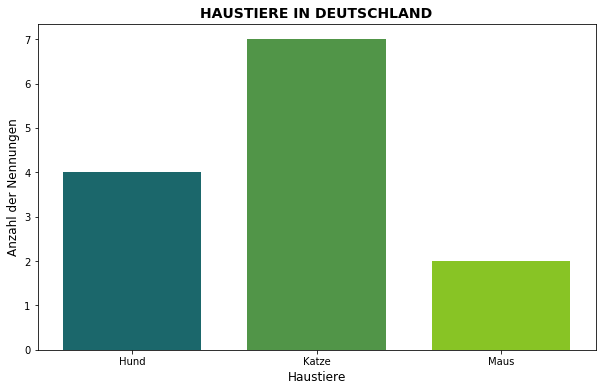

In [4]:
values = [1, 2, 3]
value_counts = [4, 7, 2]
labels = ["Hund", "Katze", "Maus"]
colors = ['#1B676B', '#519548', '#88C425']

# Abbildung konfigurieren
config = {
    "x": values,
    "height": value_counts,
    "width": 0.75,
    "tick_label": labels,
    "color": colors,
}

# Abbildung erstellen
fig, ax = plt.subplots(**figconf)
ax.bar(**config)

plt.title("Haustiere in Deutschland".upper(), **tfont)
plt.xlabel("Haustiere", **lfont)
plt.ylabel("Anzahl der Nennungen", **lfont)

# Abbildung anzeigen
plt.show()

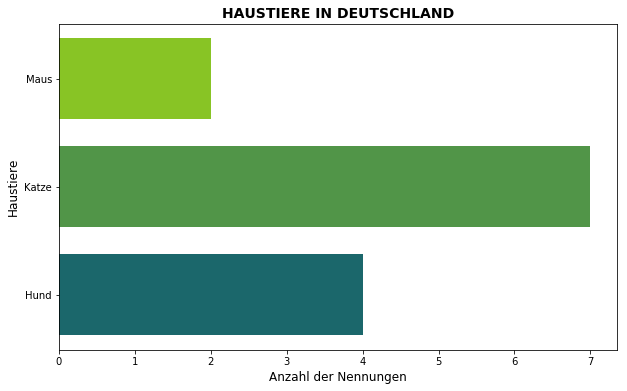

In [5]:
values = [0, 1, 2]
value_counts = [4, 7, 2]
labels = ["Hund", "Katze", "Maus"]
colors = ['#1B676B', '#519548', '#88C425']

# Abbildung konfigurieren
config = {
    "y": values,
    "width": value_counts,
    "height": 0.75,
    "tick_label": labels,
    "color": colors,
}

# Abbildung erstellen
fig, ax = plt.subplots(**figconf)
ax.barh(**config)

# Beschriftungen hinzufügen
plt.title("Haustiere in Deutschland".upper(), **tfont)
plt.ylabel("Haustiere", **lfont)
plt.xlabel("Anzahl der Nennungen", **lfont)

# Abbildung anzeigen
plt.show()

----
# Histogramme

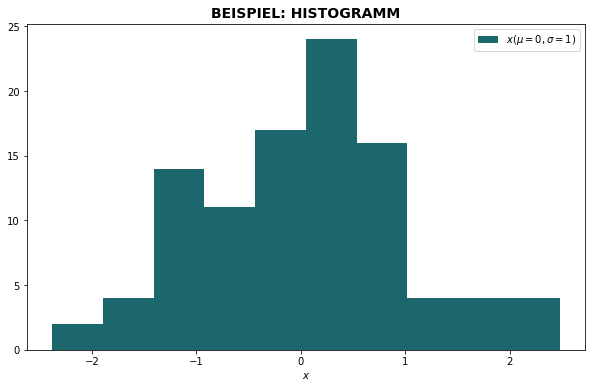

In [6]:
np.random.seed(4)
x = np.random.normal(size=100)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x=x, color="#1B676B", label=r"$x (\mu=0, \sigma=1)$")

# Beschriftung
plt.title("Beispiel: Histogramm".upper(), **tfont)
plt.xlabel("$x$")
plt.legend()
plt.savefig("matplotlib-histogramm", dpi=300)

plt.show()

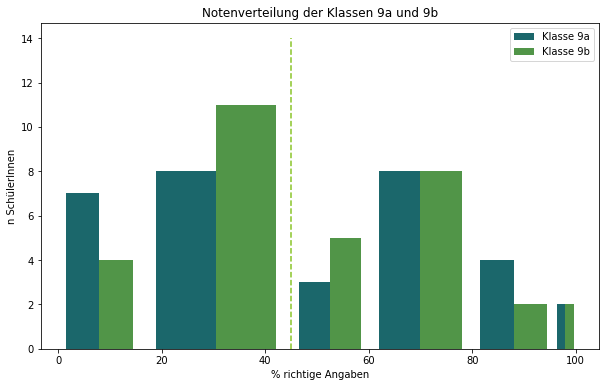

In [7]:
# Random Noten-Daten
n = 32
np.random.seed(12)
noten_9a = np.random.randint(0, 101, size=n)

np.random.seed(13)
noten_9b = np.random.randint(0, 101, size=n)

# Notenschlüssel / Noten-Intervall: Noten 1-6
"""
1 (sehr gut): 96 - 100
2 (gut): 80 - 95
3 (befriedigend): 60 - 79
4 (ausreichend): 45 - 59
5 (mangelhaft): 16 - 44
6 (ungenügend): 0 - 15
"""
interval = [0, 16, 45, 60, 80, 96, 100]
colors = ['#1B676B', '#519548']

config = {
    "x": [noten_9a, noten_9b],
    "bins": interval,
    "color": colors,
    "label": ["Klasse 9a", "Klasse 9b"],
}

fig, ax = plt.subplots(**figconf)
ax.hist(**config)

# horizontale Linie einfügen
h = 15
xline = h * [45]
yline = range(0, h)
ax.plot(xline, yline, "--", c="#88C425")

plt.title("Notenverteilung der Klassen 9a und 9b")
plt.xlabel("% richtige Angaben")
plt.ylabel("n SchülerInnen")

plt.legend()
plt.show()

----

# Liniendiagramm erstellen

## einfaches Liniendiagramm

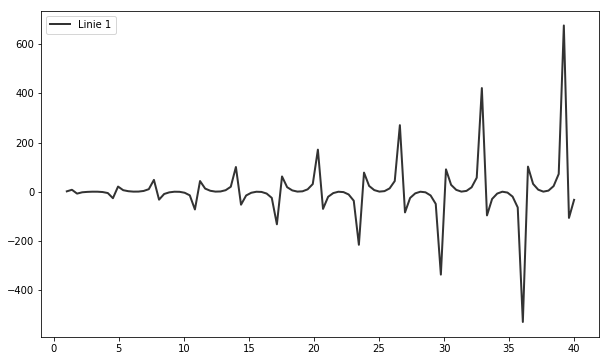

In [8]:
x = np.linspace(1, 40, 100)
y = x * np.sin(x) * np.tan(x)

conf = {
    "linewidth": 2,
    "label": "Linie 1",
    "alpha": 0.8,
}

fig, ax = plt.subplots(**figconf)
ax.plot(x, y, "k-", **conf)
ax.legend()

plt.show()

## Verschiedene Linien in einer Grafik

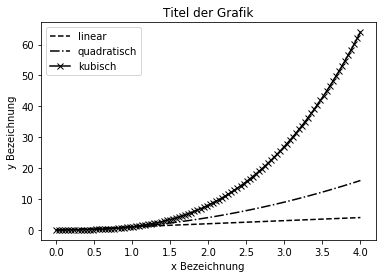

In [9]:
x = np.linspace(0, 4, 100)
y_1, y_2, y_3 = x, x**2, x**3

plt.plot(x, y_1, "k--", label='linear')
plt.plot(x, y_2, "k-.", label='quadratisch')
plt.plot(x, y_3, "k-x", label='kubisch')

plt.xlabel('x Bezeichnung')
plt.ylabel('y Bezeichnung')
plt.title("Titel der Grafik")
plt.legend(loc="best")

plt.show()

## unterschiedliche Linien in einer Grafik

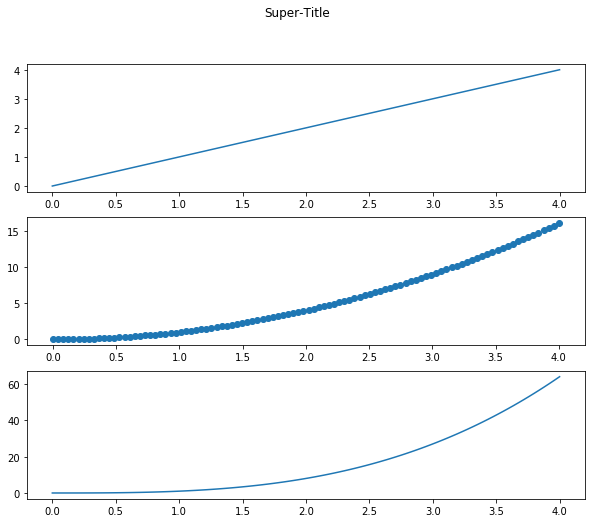

In [10]:
x = np.linspace(0, 4, 100)
y_1, y_2, y_3 = x, x**2, x**3

# Parameter für die Grafik
config = {
    "ncols": 1, 
    "nrows": 3, 
    "sharey": False, 
    "sharex": False, 
    "figsize": (10, 8),
}

# Grafik, mit 3 "Axes"-Objekten
fig, (ax1, ax2, ax3) = plt.subplots(**config)

# Überschrift
fig.suptitle("Super-Title")

ax1.plot(x, y_1)
ax2.scatter(x, y_2)
ax3.plot(x, y_3)

# Grafik anzeigen
plt.show()

## Axis-Objekte dynmisch erstellen

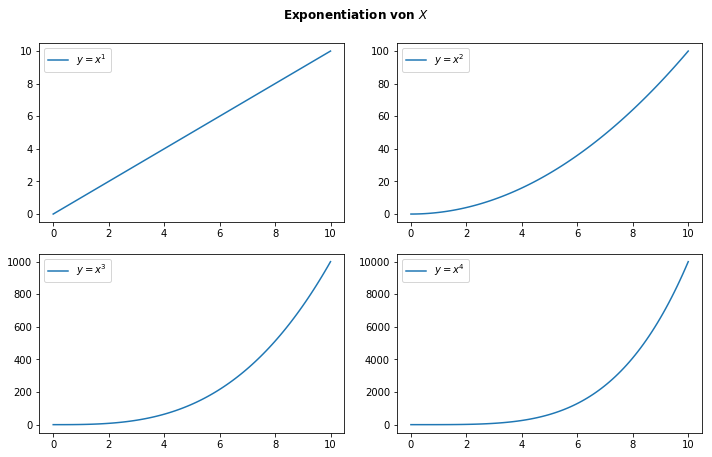

In [11]:
from itertools import chain

# Daten der Grafik
n = 4
x = np.linspace(0, 10, 100)
ydata = [x**i for i in range(1, n+1)]
labels = ["$y = x^{}$".format(i) for i in range(1, n+1)]

# Parameter für die Grafik
config = {
    "nrows": n - (n // 2), 
    "ncols": 2,
    "figsize": (10, n+2),
}

# Grafik mit Subplots anlegen
fig, axes = plt.subplots(**config)

# verschachtelte Liste -> entschachteln
axes = chain.from_iterable(axes)

# Grafik erstellen
#fig_data = list(zip(ydata, labels, axes))
for y, label, ax in zip(ydata, labels, axes):
    ax.plot(x, y, label=label)
    ax.legend(loc=2)

plt.suptitle("Exponentiation von $X$", y=1.05, fontweight="bold")
plt.tight_layout()

# Grafik speichern
plt.show()

----
# Scatterplot

## Einfache Punktwolke

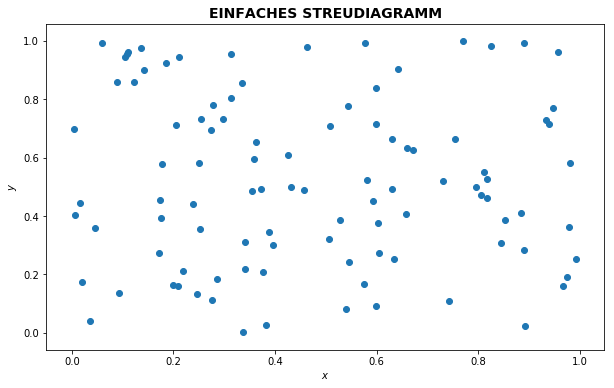

In [12]:
n = 100
np.random.seed(n)

x = np.random.rand(n)
y = np.random.rand(n)

fig, ax = plt.subplots(**figconf)
ax.scatter(x, y)

title = "Einfaches Streudiagramm".upper()
plt.title(title, **tfont)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

## Scatterplot mit wertbasierter Punktgröße

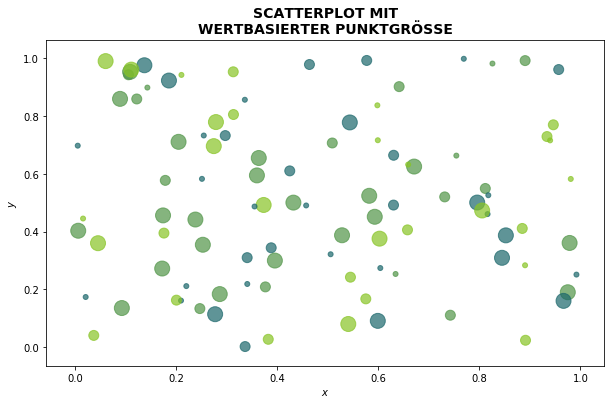

In [13]:
# Konstanten 
n = 100
color = ['#1B676B', '#519548', '#88C425']

# Daten generieren
np.random.seed(n)
x = np.random.rand(n)
y = np.random.rand(n)
cmap = [color[i] for i in np.random.randint(0, 3, n)]
size = (5 * np.random.randint(1, 4, n)) ** 2

# Grafik anlegen
fig, ax = plt.subplots(**figconf)
ax.scatter(x, y, c=cmap, s=size, alpha=0.7)

# Beschriftungen einfügen
tfont = {
    "family": "sans-serif",
    "weight": "bold",
    "size": "14"
}

title = "Scatterplot mit\nwertbasierter Punktgröße".upper()
plt.title(title, **tfont)
plt.xlabel("$x$")
plt.ylabel("$y$")

# Grafik drucken
plt.show()